In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report

%matplotlib inline

### 1. Get all the labels

In [2]:
mypath = '/Users/yinzi/Downloads/crop_part1'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [3]:
df.head()

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...
3,1,1,3,/Users/yinzi/Downloads/crop_part1/1_1_3_201612...
4,26,1,1,/Users/yinzi/Downloads/crop_part1/26_1_1_20170...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9778 entries, 0 to 9777
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     9778 non-null   object
 1   gender  9778 non-null   object
 2   race    9778 non-null   object
 3   file    9778 non-null   object
dtypes: object(4)
memory usage: 305.7+ KB


In [5]:
df.count()

age       9778
gender    9778
race      9778
file      9778
dtype: int64

In [6]:
df.describe()

,age,gender,race,file
count,9778,9778,9778,9778
unique,99,2,5,9778
top,1,1,0,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
freq,1112,5406,5265,1


In [7]:
df['gender'].unique()

array(['1', '0'], dtype=object)

In [8]:
df['race'].unique()

array(['2', '0', '3', '1', '4'], dtype=object)

In [9]:
df['age'].unique()

array(['9', '1', '16', '26', '2', '53', '36', '37', '10', '52', '18',
       '34', '30', '75', '24', '86', '3', '54', '60', '59', '41', '5',
       '45', '35', '8', '56', '4', '15', '96', '44', '23', '61', '12',
       '40', '25', '19', '38', '71', '49', '89', '21', '22', '68', '27',
       '33', '80', '57', '7', '69', '55', '85', '39', '32', '58', '17',
       '29', '90', '13', '48', '51', '46', '65', '20', '79', '31', '83',
       '11', '50', '28', '87', '77', '63', '67', '14', '62', '6', '47',
       '42', '76', '74', '92', '66', '73', '78', '64', '43', '70', '72',
       '82', '88', '84', '81', '93', '95', '110', '101', '100', '99',
       '91'], dtype=object)

In [10]:
df['age']= df['age'].astype('int')
df['gender']= df['gender'].astype('int')
df['race']= df['race'].astype('int')
df.dtypes

age        int64
gender     int64
race       int64
file      object
dtype: object

In [11]:
df.head()

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...
3,1,1,3,/Users/yinzi/Downloads/crop_part1/1_1_3_201612...
4,26,1,1,/Users/yinzi/Downloads/crop_part1/26_1_1_20170...


### 2. show the image

In [12]:
df['file'][0]

'/Users/yinzi/Downloads/crop_part1/9_1_2_20161219204347420.jpg.chip.jpg'

In [13]:
image1 = plt.imread(df['file'][0])
image1.shape

(200, 200, 3)

In [14]:
image1[0:3]

array([[[ 93, 107,  74],
        [ 90, 104,  71],
        [ 87, 101,  68],
        ...,
        [ 20,  30,  22],
        [ 19,  29,  21],
        [ 20,  27,  20]],

       [[ 92, 107,  74],
        [ 90, 104,  71],
        [ 86, 100,  67],
        ...,
        [ 20,  30,  22],
        [ 21,  28,  21],
        [ 20,  27,  20]],

       [[ 91, 106,  73],
        [ 89, 104,  71],
        [ 86, 100,  67],
        ...,
        [ 20,  30,  22],
        [ 20,  27,  20],
        [ 20,  27,  20]]], dtype=uint8)

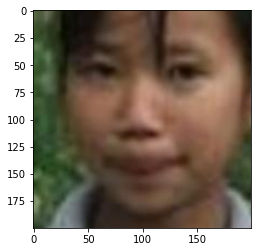

In [15]:
plt.imshow(image1)
plt.show()

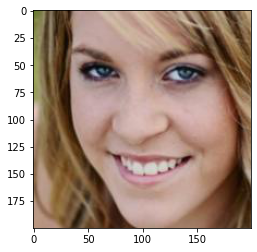

In [16]:
image2 = plt.imread(df['file'][50])
plt.imshow(image2)
plt.show()

### 3. Gradient Boosting model processing

In [17]:
df.head(3)

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...


In [18]:
images = []
for img_path in df['file']:
    image = plt.imread(img_path)
    images.append(image)

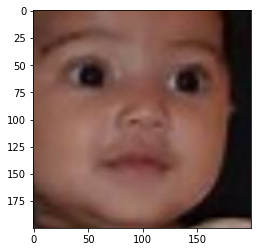

In [19]:
plt.imshow(images[3])

In [20]:
images[3].shape

(200, 200, 3)

In [21]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

### 3. Gender prediction

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images, df['gender'])

In [23]:
len(X_train), len(X_test), len(y_train), len(y_test)

(7333, 2445, 7333, 2445)

In [24]:
pd.Series(X_train).shape

(7333,)

In [25]:
X_train[1].shape

(200, 200, 3)

* Each image is represented as a 200*200 pixel array, so there are 40000 features per image. Each image has three channel. we have 7333 images in the training dataset and 2445 images in the testing dataset. Each "feature" represents a pixel in the image, and each pixel can take any integer value from 0 to 255.

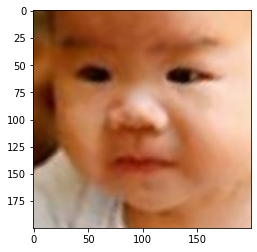

In [26]:
plt.imshow(X_train[1])

In [27]:
y_train.shape

(7333,)

In [28]:
y_train[0:5]

8598    1
2121    0
9051    1
5524    1
6107    1
Name: gender, dtype: int64

In [29]:
y_train.value_counts()

1    4034
0    3299
Name: gender, dtype: int64

In [30]:
y_test.value_counts()

1    1372
0    1073
Name: gender, dtype: int64

* The target variable is a label for Male and Female: 0, 1. There are 3299 male images in the training dataset and 4034 female images in the training dataset. And 1372 female images in the testing dataset. 1073 male images in the training dataset.

* scaling the features so that each feature takes on a value between 0 and 1

In [31]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

In [32]:
X_train.shape

(7333, 200, 200, 3)

In [33]:
nimages, nX, ny, nrgb = X_train.shape
X_train = X_train.reshape((nimages,nX*ny*nrgb))
nimages, nX, ny, nrgb = X_test.shape
X_test = X_test.reshape((nimages,nX*ny*nrgb))

In [34]:
X_train.shape, X_test.shape

((7333, 120000), (2445, 120000))

In [35]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [36]:
y_pred = gbc.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred))

[[ 778  295]
 [ 268 1104]]


In [38]:
print("GBC accuracy is %2.2f" % accuracy_score(y_test, y_pred))

GBC accuracy is 0.77


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1073
           1       0.79      0.80      0.80      1372

    accuracy                           0.77      2445
   macro avg       0.77      0.76      0.77      2445
weighted avg       0.77      0.77      0.77      2445



In [41]:
y_pred[0:5]

array([1, 1, 1, 1, 1])

The accuracy is 0.77 for the basic Gradient Boosting model. We can try some feature selection and feature extraction, dimension reduction or hyperparameter tuning to improve the accuracy. 

### 4. race prediction

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(images, df['race'])

In [53]:
X2_train = np.array(X2_train)/255
X2_test = np.array(X2_test)/255

In [54]:
nimages, nX2, ny2, nrgb = X2_train.shape
X2_train = X2_train.reshape((nimages,nX2*ny2*nrgb))
nimages, nX2, ny, nrgb = X2_test.shape
X2_test = X2_test.reshape((nimages,nX2*ny2*nrgb))

In [60]:
gbc.fit(X2_train,y2_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [61]:
y2_pred = gbc.predict(X2_test)

In [62]:
print(confusion_matrix(y2_test, y2_pred))
print("GBC accuracy is %2.2f" % accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[1268    4   29   36   11]
 [  43   31    0   13    5]
 [ 110    1  239   15   10]
 [ 137    4   11  211   11]
 [ 162    1   12   41   40]]
GBC accuracy is 0.73
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1348
           1       0.76      0.34      0.47        92
           2       0.82      0.64      0.72       375
           3       0.67      0.56      0.61       374
           4       0.52      0.16      0.24       256

    accuracy                           0.73      2445
   macro avg       0.70      0.53      0.57      2445
weighted avg       0.72      0.73      0.70      2445



### 5. age prediction

In [63]:
df.head(3)

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...


In [66]:
df['age'].unique()

array([  9,   1,  16,  26,   2,  53,  36,  37,  10,  52,  18,  34,  30,
        75,  24,  86,   3,  54,  60,  59,  41,   5,  45,  35,   8,  56,
         4,  15,  96,  44,  23,  61,  12,  40,  25,  19,  38,  71,  49,
        89,  21,  22,  68,  27,  33,  80,  57,   7,  69,  55,  85,  39,
        32,  58,  17,  29,  90,  13,  48,  51,  46,  65,  20,  79,  31,
        83,  11,  50,  28,  87,  77,  63,  67,  14,  62,   6,  47,  42,
        76,  74,  92,  66,  73,  78,  64,  43,  70,  72,  82,  88,  84,
        81,  93,  95, 110, 101, 100,  99,  91])

In [68]:
len(df['age'].unique())

99

In [69]:
df['age'].max(), df['age'].min()

(110, 1)

* According to the "Stage of life": Infancy = 0-2 year, Toddler = 2-4 years, Child = 5-12 years, Teen = 13-19 years, Adult = 20-39 years, Middle Age Adult = 40-59 years, Senior Adult = 60+